<a href="https://colab.research.google.com/github/SirOnuigweVitus/MyProjects/blob/master/Face_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install imutils

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1ANZKYJGS-HdXvHNK3QDhmyypB1_-DVBP'}) # replace the id with id of file you want to access
downloaded.GetContentFile('opencv-tutorial.zip') 

In [6]:
!unzip opencv-tutorial.zip

Archive:  opencv-tutorial.zip
   creating: opencv-tutorial/
  inflating: opencv-tutorial/jp.png  
  inflating: opencv-tutorial/opencv_tutorial_01.py  
  inflating: opencv-tutorial/opencv_tutorial_02.py  
  inflating: opencv-tutorial/tetris_blocks.png  


In [0]:
# import the necessary packages
import imutils
import cv2

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [35]:
image = cv2.imread("/content/opencv-tutorial/jp.png")
image

array([[[ 58,  46,  46],
        [ 58,  46,  46],
        [ 58,  46,  46],
        ...,
        [ 76,  50,  39],
        [ 76,  50,  36],
        [ 76,  52,  36]],

       [[ 56,  44,  44],
        [ 56,  44,  44],
        [ 57,  45,  45],
        ...,
        [ 74,  47,  35],
        [ 74,  48,  34],
        [ 75,  51,  35]],

       [[ 55,  43,  43],
        [ 56,  44,  44],
        [ 57,  45,  45],
        ...,
        [ 73,  49,  35],
        [ 74,  48,  38],
        [ 75,  49,  39]],

       ...,

       [[104,  99, 138],
        [106, 101, 140],
        [108, 103, 142],
        ...,
        [119, 101,  95],
        [119, 101,  94],
        [116, 101,  93]],

       [[109, 105, 136],
        [110, 105, 136],
        [111, 108, 139],
        ...,
        [121, 105,  99],
        [119, 103,  97],
        [115, 102,  95]],

       [[ 40,  37,  63],
        [ 39,  36,  62],
        [ 38,  35,  61],
        ...,
        [ 55,  40,  34],
        [ 52,  40,  34],
        [ 50,  38,  33]]

In [68]:
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread("/content/opencv-tutorial/jp.png")
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))


width=600, height=322, depth=3


In [0]:
from google.colab.patches import cv2_imshow

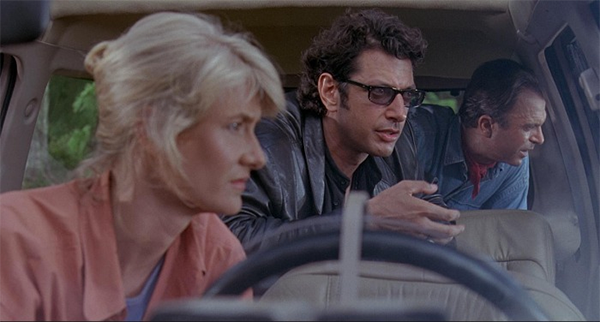

In [46]:
#Import image
image = cv2.imread("/content/opencv-tutorial/jp.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(image)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0  27500      0 --:--:-- --:--:-- --:--:-- 27500


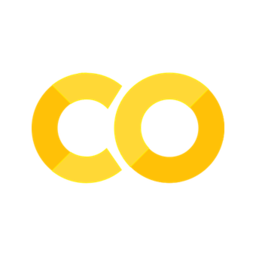

In [26]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

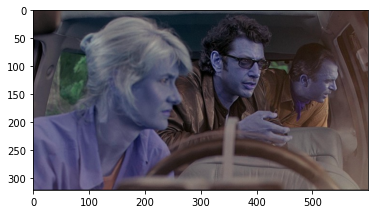

In [42]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("/content/opencv-tutorial/jp.png")

#Show the image with matplotlib
plt.imshow(image)
plt.show()

In [69]:
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


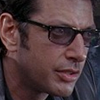

In [55]:
#Import image
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=320,y=60 at ending at x=420,y=160
roi = image[60:160, 320:420]

cv2_imshow(roi)

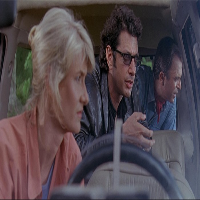

In [56]:
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(image, (200, 200))

cv2_imshow(resized)

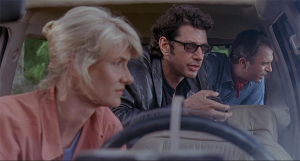

In [50]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
image = cv2.imread("/content/opencv-tutorial/jp.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(resized)


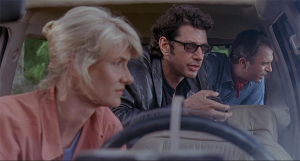

In [51]:
# manually computing the aspect ratio can be a pain so let's use the
# imutils library instead
resized = imutils.resize(image, width=300)
image = cv2.imread("/content/opencv-tutorial/jp.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(resized)


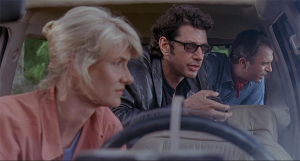

In [52]:
# let's rotate an image 45 degrees clockwise using OpenCV by first
# computing the image center, then constructing the rotation matrix,
# and then finally applying the affine warp
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
image = cv2.imread("/content/opencv-tutorial/jp.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(resized)

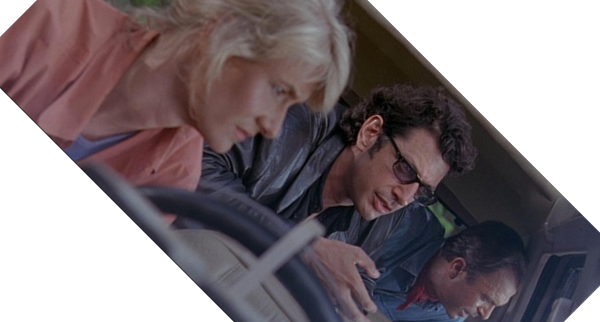

In [57]:
# rotation can also be easily accomplished via imutils with less code
rotated = imutils.rotate(image, -45)
cv2_imshow(rotated)

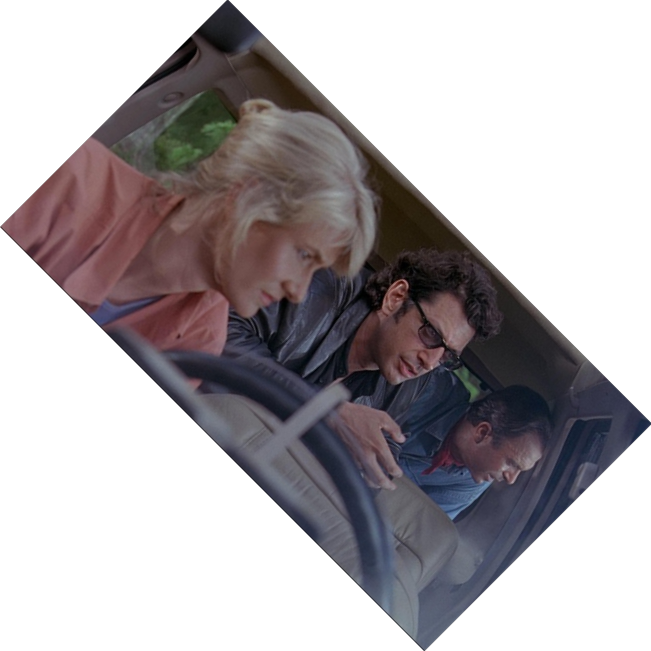

In [61]:
# OpenCV doesn't "care" if our rotated image is clipped after rotation
# so we can instead use another imutils convenience function to help
# us out
rotated = imutils.rotate_bound(image, 45)
cv2_imshow(rotated)


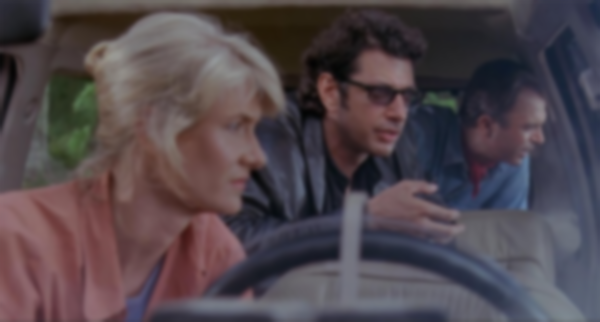

In [62]:
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2_imshow(blurred)

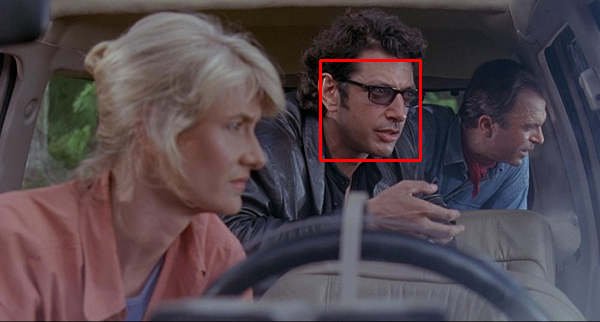

In [70]:
# draw a 2px thick red rectangle surrounding the face
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
cv2_imshow(output)

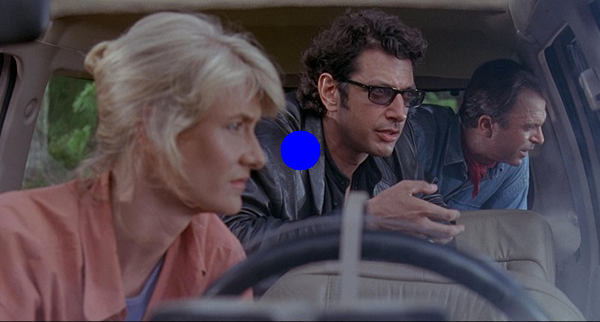

In [71]:
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
cv2_imshow(output)

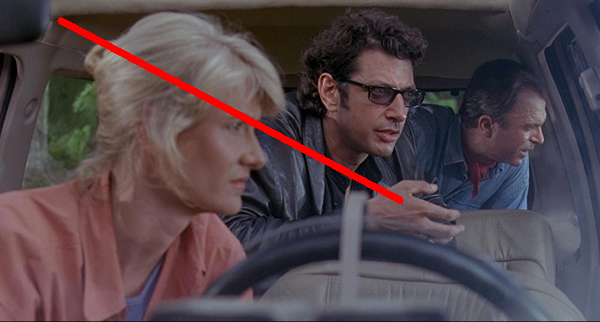

In [72]:
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
cv2_imshow(output)

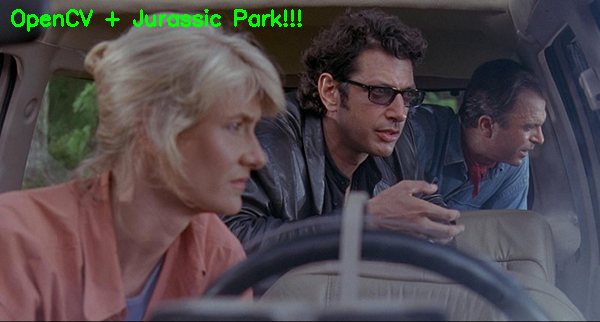

In [73]:
# draw green text on the image
output = image.copy()
cv2.putText(output, "OpenCV + Jurassic Park!!!", (10, 25), 
	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2_imshow(output)